# **VERİ SETİNİN SAYFAYA ÇAĞIRILMASI****

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")           #gerekli kütüphaneler import edildi

In [3]:
dfC = pd.read_csv('/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv'
)   #dfC adında bir değişken oluşturulmuş ve veri okuması sağlanmıştır

In [4]:
df = dfC.copy()  #df değişkeni üretilmiş ve dfC değişkeni kopyalanmıştır buradaki hedef ana veriyi bozmamaktı

# **KEŞİFSEL VERİ ANALİZİ(EDA - Exploratory Data Analysis) ****

In [5]:
df.head(3)      #datanın ilk 3 satırını getirmiş olduk

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0


In [6]:
df.tail(3)      #datanın son 3 satırını getirmiş olduk

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1
568629,568629,-0.795144,0.433236,-0.649140,0.374732,-0.244976,-0.603493,-0.347613,-0.340814,0.253971,...,0.534853,-0.291514,0.157303,0.931030,-0.349423,-1.090974,-1.575113,0.722936,21493.92,1


In [7]:
df.info()       #data hakkında özet bilgi sağlar

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [8]:
df.describe().T      #data hakkında istatistiksel bilgiler elde ediyoruz

,count,mean,std,min,25%,50%,75%,max
id,568630.0,2.843145e+05,164149.486122,0.000000,142157.250000,284314.500000,426471.750000,568629.000000
V1,568630.0,-5.638058e-17,1.000001,-3.495584,-0.565286,-0.093638,0.832658,2.229046
V2,568630.0,-1.319545e-16,1.000001,-49.966572,-0.486678,-0.135894,0.343555,4.361865
V3,568630.0,-3.518788e-17,1.000001,-3.183760,-0.649299,0.000353,0.628538,14.125834
V4,568630.0,-2.879008e-17,1.000001,-4.951222,-0.656020,-0.073762,0.707005,3.201536
V5,568630.0,7.997245e-18,1.000001,-9.952786,-0.293496,0.081088,0.439737,42.716891
V6,568630.0,-3.958636e-17,1.000001,-21.111108,-0.445871,0.078718,0.497788,26.168402
V7,568630.0,-3.198898e-17,1.000001,-4.351839,-0.283533,0.233366,0.525955,217.873038
V8,568630.0,2.109273e-17,1.000001,-10.756342,-0.192257,-0.114524,0.047299,5.958040
V9,568630.0,3.998623e-17,1.000001,-3.751919,-0.568745,0.092526,0.559262,20.270062


In [9]:
df.median()      #Medyanı değerini kullanarak, verilerin merkez eğilimlerini anlamaya ve dağılım hakkında bilgi edinmek çalışıyoruz

id        284314.500000
V1            -0.093638
V2            -0.135894
V3             0.000353
V4            -0.073762
V5             0.081088
V6             0.078718
V7             0.233366
V8            -0.114524
V9             0.092526
V10            0.262614
V11           -0.041050
V12            0.162052
V13            0.017608
V14            0.230501
V15           -0.039256
V16            0.134026
V17            0.271641
V18            0.087294
V19           -0.025979
V20           -0.123378
V21           -0.037431
V22           -0.027329
V23           -0.059689
V24            0.015901
V25           -0.008193
V26           -0.011892
V27           -0.172911
V28           -0.013930
Amount     12030.150000
Class          0.500000
dtype: float64

In [10]:
df.isnull().sum()     #veri kümesi içinde boş değer olup olmadığı kontrol ediliyor

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
df.columns    #veri setinin kolonlarını getirebiliriz

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [12]:
df.shape   #veri setinin kaç satır ve sütün değerlerinden oluştuğunu görebiliriz

(568630, 31)

In [13]:
df.duplicated().sum()   #veri seti içinde tekrar eden satırları bize gösterir

0

# **VERİ GÖRSELLEŞTİRME****

In [14]:
korelasyon = df.corr()    #korelasyon adında değişken türetilip df değişkenin korelasyon değerleri atarnır

In [15]:
print(korelasyon)    #bu değerler ekrana bastırılır

              id        V1        V2        V3        V4        V5        V6  \
id      1.000000 -0.395741  0.424267 -0.663655  0.617554 -0.268445 -0.387916   
V1     -0.395741  1.000000 -0.561184  0.484499 -0.498963  0.517462  0.354728   
V2      0.424267 -0.561184  1.000000 -0.627810  0.579638 -0.631669 -0.341040   
V3     -0.663655  0.484499 -0.627810  1.000000 -0.687726  0.510351  0.508974   
V4      0.617554 -0.498963  0.579638 -0.687726  1.000000 -0.429243 -0.474403   
V5     -0.268445  0.517462 -0.631669  0.510351 -0.429243  1.000000  0.245187   
V6     -0.387916  0.354728 -0.341040  0.508974 -0.474403  0.245187  1.000000   
V7     -0.414288  0.573381 -0.694022  0.634336 -0.588648  0.586828  0.418703   
V8      0.121282 -0.226757  0.191321 -0.263018  0.199013 -0.314975 -0.604491   
V9     -0.508427  0.548973 -0.585095  0.648615 -0.676648  0.479614  0.432241   
V10    -0.578014  0.599108 -0.621798  0.707676 -0.712839  0.563874  0.471000   
V11     0.589321 -0.525797  0.558863 -0.

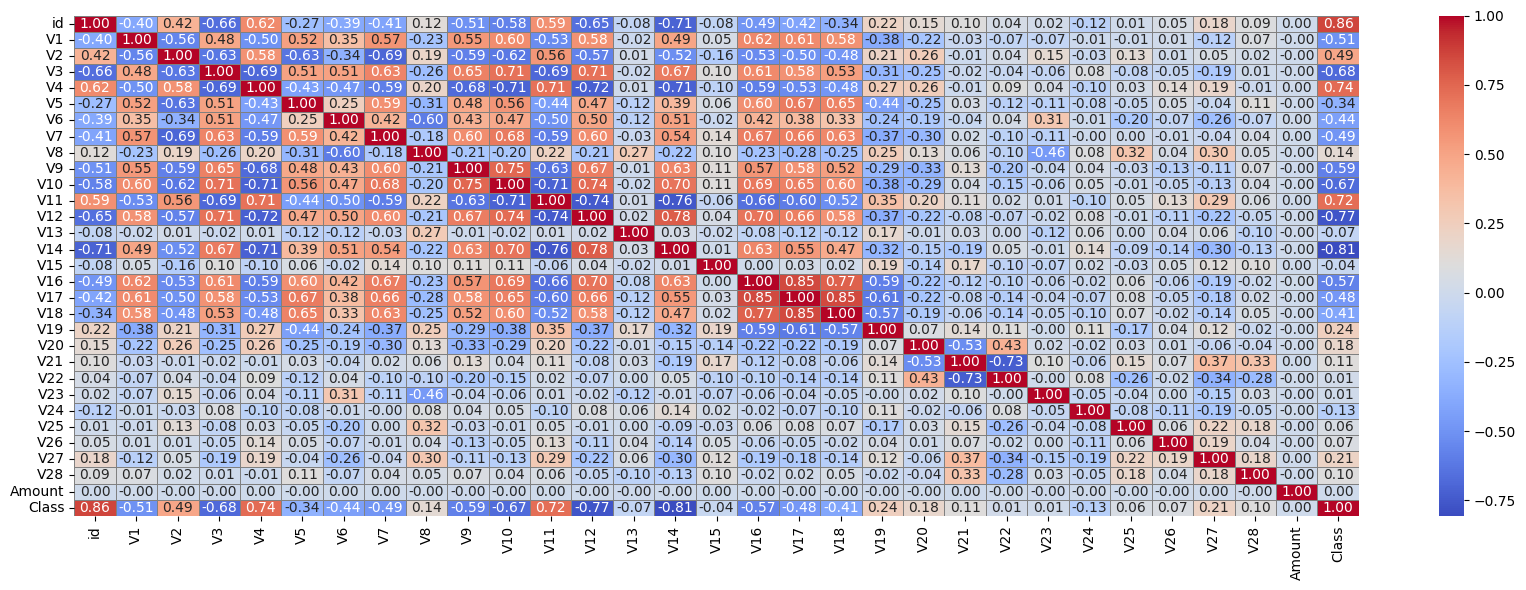

In [16]:
plt.figure(figsize=(17,6))
sns.heatmap(korelasyon, annot = True, cmap = "coolwarm", fmt= ".2f", linewidths = 0.5, linecolor = "gray")
plt.tight_layout()
plt.show()          #korelasyon verileri ısı haritası yolu ile görselleştirilir

#korelasyon sonuçları ile veriler arasındaki ilişkileri görebiliriz

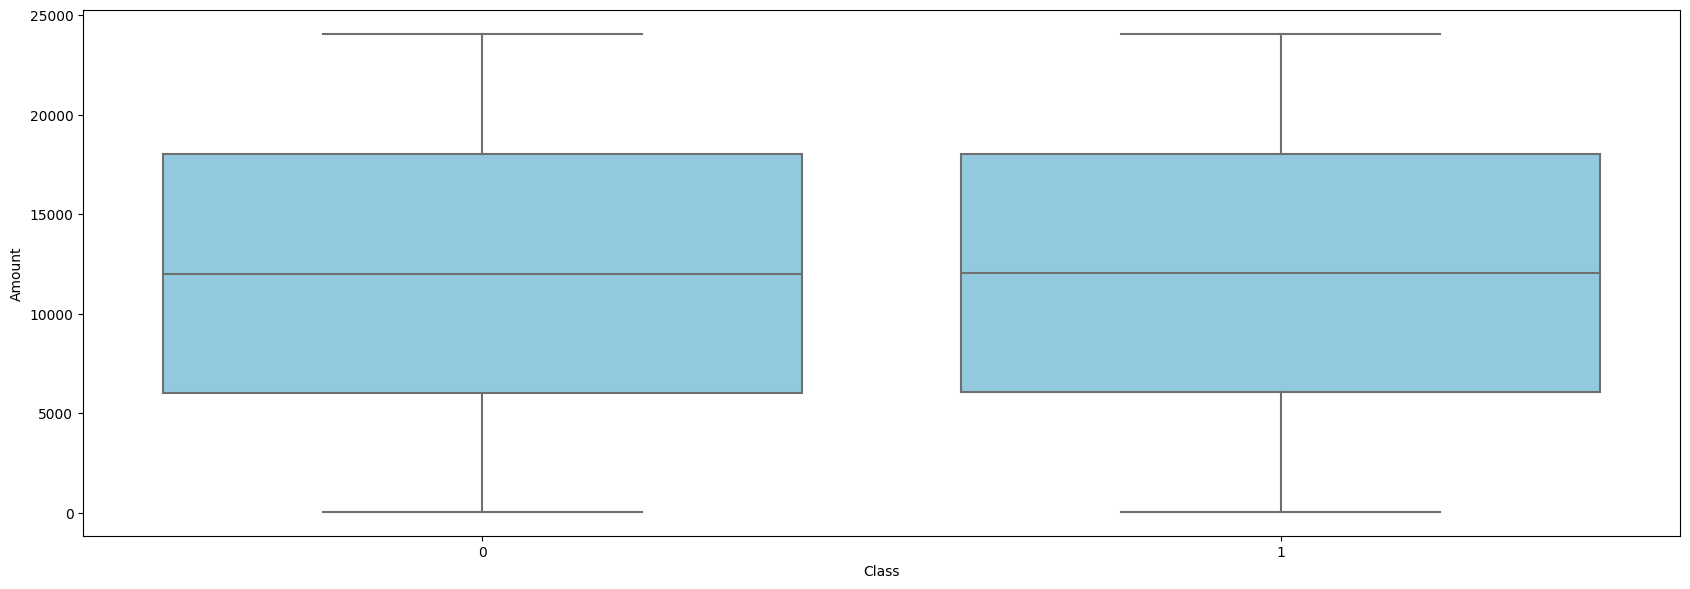

In [17]:
plt.figure(figsize=(17,6))
sns.boxplot(x= "Class", y= "Amount", data = df, color = "skyblue")
plt.xlabel("Class")
plt.ylabel("Amount")
plt.tight_layout()
plt.show()

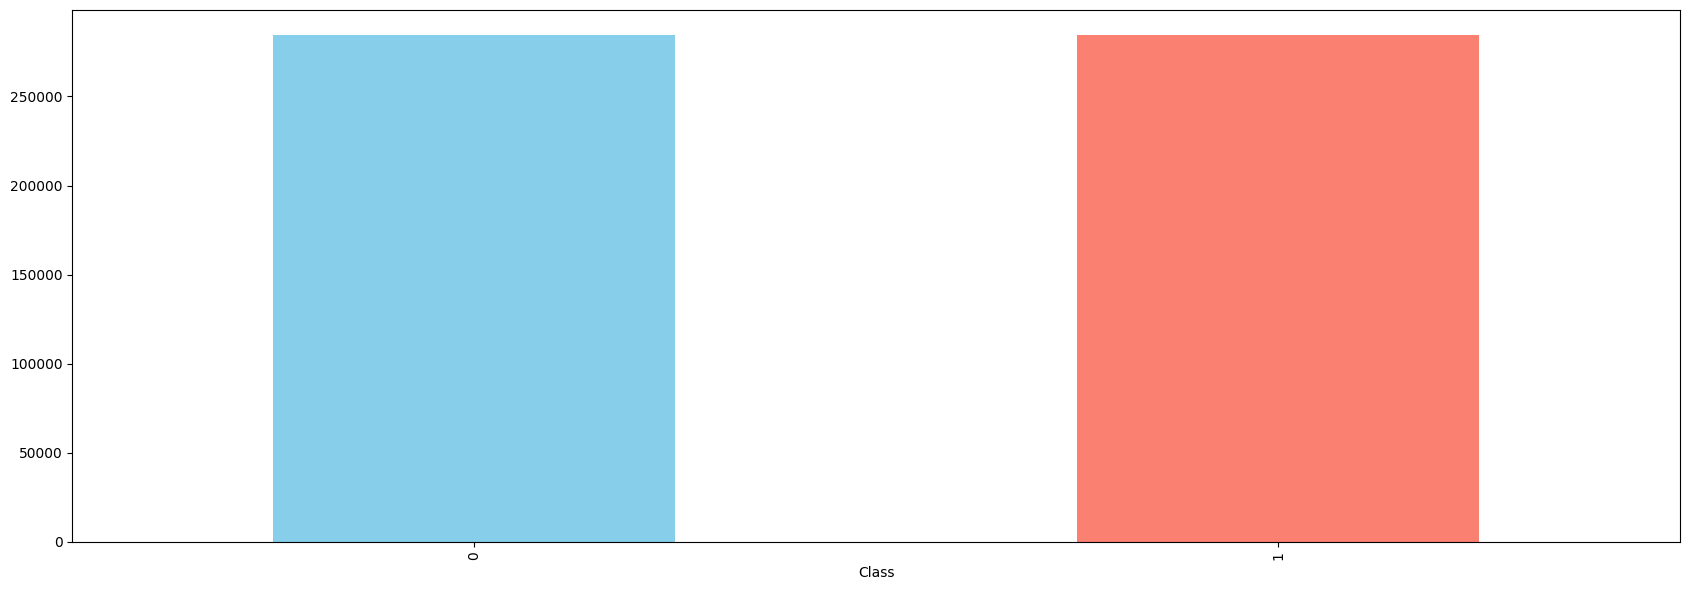

In [18]:
plt.figure(figsize=(17,6))
df['Class'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.tight_layout()
plt.show()

<Figure size 1700x600 with 0 Axes>

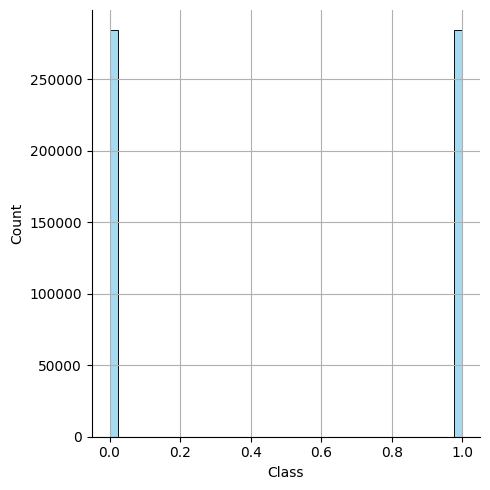

In [19]:
plt.figure(figsize=(17,6))
sns.displot(df["Class"], color = "skyblue")
plt.grid()
plt.tight_layout()
plt.show()

<Figure size 1700x600 with 0 Axes>

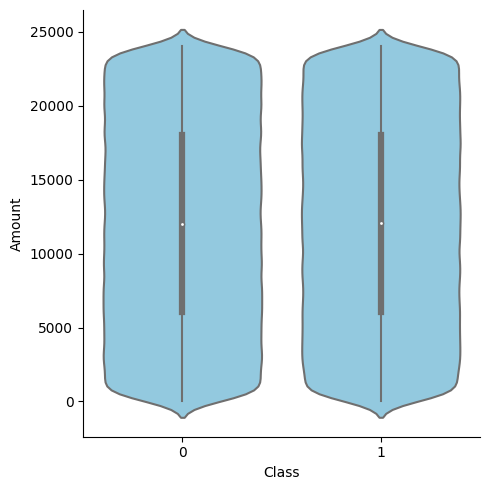

In [20]:
plt.figure(figsize= (17,6))
sns.catplot(x= "Class", y= "Amount", data = df, color = "skyblue", kind = "violin")
plt.tight_layout()
plt.show()

# **VERİ ÖN İŞLEME****

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split    #Gerekli kütüphaneler import edilir

In [22]:
y = df[["Class"]]
x = df.drop("Class", axis = 1)      #Bağımlı ve bağımsız değişkenler belirlenir 

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.70, random_state = 41)     #Değişkenler train ve test olarak ayrılır

In [24]:
scaler = StandardScaler()     #Standartlaştırma işlemi için StandardScaler çağırılır

In [25]:
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)            #Standartlaştırma işlemi yapılır

# **GÖZETİMLİ ÖĞRENME ve MODEL DEĞERLENDİRME****

In [26]:
from sklearn.linear_model import LogisticRegression       #Gerekli kütüphaneler import edilir
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, log_loss
import time
from sklearn.tree import DecisionTreeClassifier

In [27]:
start_train_time = time.time()
lr = LogisticRegression()
model1 = lr.fit(x_train_scaler, y_train)
end_train_time = time.time()                                     #Burada ilk gözetimsiz öğrenme modeli LogisticRegression kullanıldı
total_train_time = end_train_time - start_train_time

y_train_pred = lr.predict(x_train_scaler)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)


start_test_time = time.time()
y_test_pred = lr.predict(x_test_scaler)
end_test_time = time.time()
total_test_time = end_test_time - start_test_time

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)


print(f"Train Time: {total_train_time}")
print(f"Train Accuracy: {train_accuracy}")
print(f"Train Precision: {train_precision}")
print(f"Train Recall: {train_recall}")
print(f"Train F1: {train_f1}")
print(f"Train Conf Matrix: {train_conf_matrix}")
print("----------------------------------------------")
print(f"Test Time: {total_test_time}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1: {test_f1}")
print(f"Test Conf Matrix: {test_conf_matrix}")

Train Time: 3.311185598373413
Train Accuracy: 0.998404686954359
Train Precision: 0.9991244974665774
Train Recall: 0.997683766266392
Train F1: 0.9984036121104247
Train Conf Matrix: [[198837    174]
 [   461 198569]]
----------------------------------------------
Test Time: 0.013077020645141602
Test Accuracy: 0.998440696645153
Test Precision: 0.9991311188605916
Test Recall: 0.9977487248636924
Test F1: 0.9984394433623542
Test Conf Matrix: [[85230    74]
 [  192 85093]]


**İlk modelimiz Logistic Regression sonuçlarının incelenmesi;****
Model hem eğitim hem de test verilerinde %99 oranında başarı göstermektedir, bu durum da modelin overfitting yani aşırı öğrenme göstermediğin kanıtıdır. 
Precision - burada dolandırıcılık olarak işaretlenen her tahminin ne kadarının gerçekten dolandırıcılık olduğunu gösterir. Burada oran hem train hem de test için %99 civarında çıkmıştır yani bu durumda yanlış pozitif durumlarının az olduğunu gösterir.
Recall - Bu kavram modelin dolandırıcılık olan durumları ne kadar iyi yakalayabileceğini gösterir. Burada hem train hem de test kısımlarında %99 civarında bir oran görülmektedir. Bu da dolandırıcılık vakalarının büyük çoğunluğunu doğru yakalamış olduğunu ifade eder. 
F1 Score - Bu kavram bize Precision ve Recall arasındaki dengeyi göstermektedir. Burada hem train hem de test verilerinin oranları incelendiğinde %99 civarında sonuç çıkmıştır. Bu da modelin iyi bir denge kurduğunu gösterir. 
Train Confusion Matrix (Karmaşıklık Matrisi) - 198,837 gerçek "0" vakasından sadece 174 tanesi yanlış olarak "1" (dolandırıcılık) olarak tahmin edilmiş.
198,569 gerçek "1" (dolandırıcılık) vakasından sadece 461 tanesi yanlış olarak "0" (dolandırıcılık değil) olarak tahmin edilmiş.
Test Confusion Matrix (Karmaşıklık Matrisi) - 85,230 gerçek "0" vakasından sadece 74 tanesi yanlış olarak "1" (dolandırıcılık) olarak tahmin edilmiş.
85,093 gerçek "1" vakasından sadece 192 tanesi yanlış olarak "0" olarak tahmin edilmiş.

In [28]:
start_train_time = time.time()
dc = DecisionTreeClassifier(max_depth=15, min_samples_split=2, min_samples_leaf=2)
model2 = dc.fit(x_train_scaler, y_train)
end_train_time = time.time()                                     #Burada ikinci gözetimsiz öğrenme modeli Decision Tree Classifier kullanıldı
total_train_time = end_train_time - start_train_time

y_train_pred = dc.predict(x_train_scaler)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)


start_test_time = time.time()
y_test_pred = dc.predict(x_test_scaler)
end_test_time = time.time()
total_test_time = end_test_time - start_test_time

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)


print(f"Train Time: {total_train_time}")
print(f"Train Accuracy: {train_accuracy}")
print(f"Train Precision: {train_precision}")
print(f"Train Recall: {train_recall}")
print(f"Train F1: {train_f1}")
print(f"Train Conf Matrix: {train_conf_matrix}")
print("----------------------------------------------")
print(f"Test Time: {total_test_time}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1: {test_f1}")
print(f"Test Conf Matrix: {test_conf_matrix}")

Train Time: 23.29043197631836
Train Accuracy: 0.9998517740634759
Train Precision: 1.0
Train Recall: 0.9997035622770437
Train F1: 0.9998517591664342
Train Conf Matrix: [[199011      0]
 [    59 198971]]
----------------------------------------------
Test Time: 0.021565675735473633
Test Accuracy: 0.9996600015241311
Test Precision: 0.9999178798934785
Test Recall: 0.9994020050419182
Test F1: 0.9996598759133504
Test Conf Matrix: [[85297     7]
 [   51 85234]]


**İkinci Modelimiz Decision Tree Classifier incelemesi;**** Modelin hem eğitim hem de test verileri %99 oranında başarı göstermektedir. Burada overfitting durumu yoktur. Precision - burada hem train hem de test çıktısı %99 civarındadır yani dolandırıcılık olarak sınıflandırıldığı durumların %99.9 oranında doğru olduğu saptanmıştır. Recall - burada ki sonuçlar hem train hem de test için %99 civarında çıkmıştır. F1 Score - burada yine hem train hem de test verileri %99 civarında çıkmıştır, burada kesinlik ve duyarlılık arasında denge iyi bir şekilde sağlandığını göstermektedir. 
Train Confusion Matrix: 199,010 örneği doğru olarak "dolandırıcılık yok" diye sınıflandırmış, sadece 1 hatalı "dolandırıcılık yok" sınıflaması yapmış.
198,970 örneği doğru olarak "dolandırıcılık var" diye sınıflandırmış, 60 hatalı "dolandırıcılık var" sınıflaması yapmış.
Test Confusion Matrix:
85,294 örneği doğru şekilde "dolandırıcılık yok" diye sınıflandırmış, sadece 10 örneği yanlış sınıflamış.
85,233 örneği doğru şekilde "dolandırıcılık var" diye sınıflandırmış, sadece 52 örneği yanlış sınıflamış.

**BURADA HER İKİ MODEL İNCELENMİŞ OLUP İÇERİSİNDE EN İYİ SONUÇ VEREN MODEL DECISION TREE CLASSIFIER OLARAK SEÇİLMİŞTİR.******

# **DECISION TREE CLASSIFIER MODEL OPTİMİZASYONU****

In [29]:
from sklearn.model_selection import cross_val_score  #çapraz doğrulama yapabilmek için sayfaya import edildi

In [30]:
cv_scores = cross_val_score(dc, x_train_scaler, y_train, cv=5, scoring='accuracy')
print(f"Çapraz Doğrulama Skorları: {cv_scores}")
print(f"Ortalama CV Skoru: {cv_scores.mean()}")                #Burada çapraz doğrulama işlemi yapılmıştır

Çapraz Doğrulama Skorları: [0.99969853 0.99966084 0.99961059 0.99973621 0.99968596]
Ortalama CV Skoru: 0.9996784250363617


In [31]:
from sklearn.model_selection import GridSearchCV      #hiper parametre optimizasyonu için sayfaya import edilir

In [32]:
param_grid = {
    'max_depth': [10, 15, 20, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=dc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(x_train_scaler, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"En İyi Hiperparametreler: {best_params}")
print(f"En İyi CV Skoru: {best_score}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
En İyi Hiperparametreler: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
En İyi CV Skoru: 0.9997035480448933


**ÇIKAN EN İYİ HİPER PARAMETRELERE GÖRE MODELİ TEKRARDAN EĞİTME VE TEST ETME****

In [33]:
start_train_time = time.time()
dc = DecisionTreeClassifier(max_depth=15, min_samples_split=5, min_samples_leaf=2) #bu kısım güncellendi
model2 = dc.fit(x_train_scaler, y_train)
end_train_time = time.time()                                     #Burada ikinci gözetimsiz öğrenme modeli Decision Tree Classifier en iyi sonuçlara göre eğitildi
total_train_time = end_train_time - start_train_time

y_train_pred = dc.predict(x_train_scaler)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)


start_test_time = time.time()
y_test_pred = dc.predict(x_test_scaler)
end_test_time = time.time()
total_test_time = end_test_time - start_test_time

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)


print(f"Train Time: {total_train_time}")
print(f"Train Accuracy: {train_accuracy}")
print(f"Train Precision: {train_precision}")
print(f"Train Recall: {train_recall}")
print(f"Train F1: {train_f1}")
print(f"Train Conf Matrix: {train_conf_matrix}")
print("----------------------------------------------")
print(f"Test Time: {total_test_time}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1: {test_f1}")
print(f"Test Conf Matrix: {test_conf_matrix}")

Train Time: 22.696316719055176
Train Accuracy: 0.9998417248474404
Train Precision: 0.9999949740914413
Train Recall: 0.9996884891724865
Train F1: 0.9998417081449954
Train Conf Matrix: [[199010      1]
 [    62 198968]]
----------------------------------------------
Test Time: 0.017221689224243164
Test Accuracy: 0.9996365533533815
Test Precision: 0.999882688314583
Test Recall: 0.9993902796505834
Test F1: 0.9996364233439671
Test Conf Matrix: [[85294    10]
 [   52 85233]]
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=  19.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=  18.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10; total time=  18.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=  18.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=  17.8s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=  19.0s
[CV] END max_depth=10, min_

# **GÖZETİMSİZ ÖĞRENME VE MODEL DEĞERLENDİRME ****

In [34]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score       #gerekli kütüphaneler dahil edilir

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=  18.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=  17.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=  18.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10; total time=  18.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=  17.6s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=  18.9s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10; total time=  17.7s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10; total time=  18.6s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2; total time=  17.5s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5; total time=  17.9s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10; total time=  17.3s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=2; total time=  25.8s


In [35]:
n_clusters = 2

start_train_time = time.time()
kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=11, batch_size=1000, max_iter=100)
kmeans.fit(x_train_scaler)
end_train_time = time.time()
total_train_time = end_train_time - start_train_time

y_train_pred = kmeans.predict(x_train_scaler)
train_silhouette_score = silhouette_score(x_train_scaler, y_train_pred, sample_size=10000)  # Daha küçük bir örnekleme

start_test_time = time.time()
y_test_pred = kmeans.predict(x_test_scaler)
end_test_time = time.time()
total_test_time = end_test_time - start_test_time

test_silhouette_score = silhouette_score(x_test_scaler, y_test_pred, sample_size=5000)  # Daha küçük bir örnekleme

print(f"Train Time: {total_train_time}")
print(f"Train Silhouette Score: {train_silhouette_score}")
print("------------------------------------------------------------")
print(f"Test Time: {total_test_time}")
print(f"Test Silhouette Score: {test_silhouette_score}")

Train Time: 0.5199334621429443
Train Silhouette Score: 0.2859203190247989
------------------------------------------------------------
Test Time: 0.025744915008544922
Test Silhouette Score: 0.28078737466316245


MiniBatchKMeans algoritmasını tercih etmemin temel nedeni,büyük veri setlerinde KMeans algoritmasının eğitim ve test aşamalarında süre oldukça uzundur. Ancak öte yanda MiniBatchKMeans algoritması, veri setinin tamamını kullanmak yerine küçük rastgele örneklem grupları ile çalışarak kümeleri daha hızlı ve verimli bir şekilde günceller. Bu yaklaşım, özellikle büyük veri setlerinde işlem süresini azaltırken, kümelerin kalitesini makul bir seviyede tutar. Eğitim ve test sürelerinin uzun olmasını önlemek amacıyla MiniBatchKMeans kullanılmıştır, yani elimizdeki bu veri setinin büyüklüğüne karşılık böyle bir çözüm yolu geliştirilmiştir.


MiniBatchKMeans sonuçlarının yorumlanması; 
* Eğitim Süresi (Train Time): Eğitim süresi oldukça kısa (0.303 saniye), bu da MiniBatchKMeans algoritmasının hızlı çalıştığını ve büyük veri setlerinde performans açısından ciddi bir avantaj sağladığını gösterir. Eğitim süresinin düşük olması, özellikle çok fazla veri ile çalışıldığında önemli bir kazançtır.
* Silhouette Skoru: Bu skor da eğitim kümesi (0.2787) ve test kümesi (0.2821) için silhouette skorları oldukça düşük, bu da kümelerin çok iyi ayrılmadığını ve veri noktalarının kümelere net bir şekilde dağılmadığını gösteriyor. Yani, sonuçlar modelin çok güçlü olmadığını, kümeler arasında belirgin bir fark yaratmadığını işaret ediyor.
* Test Süresi (Test Time): Test süresi de oldukça kısa (0.078 saniye). Bu, modelin daha önce oluşturulan kümeleri kullanarak yeni verileri tahmin etme sürecinin oldukça verimli olduğunu gösterir.

**MiniBatchKMeans Algoritmasının Performansını Artırma****

In [36]:
from sklearn.decomposition import PCA   #gerekli kütüphaneler sayfaya dahil edilir

In [37]:
pca = PCA(n_components=0.95)                               # veri boyutu azaltma işlemi yapılır
x_train_reduced = pca.fit_transform(x_train_scaler)
x_test_reduced = pca.transform(x_test_scaler)

n_clusters = 3                                             # burada küme sayısı değiştirilir
start_train_time = time.time()
kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=0, batch_size=2000, max_iter=200)
kmeans.fit(x_train_reduced)
end_train_time = time.time()
total_train_time = end_train_time - start_train_time

y_train_pred = kmeans.predict(x_train_reduced)
train_silhouette_score = silhouette_score(x_train_reduced, y_train_pred, sample_size=30000)           # daha büyük örnekleme alınır

start_test_time = time.time()
y_test_pred = kmeans.predict(x_test_reduced)
end_test_time = time.time()
total_test_time = end_test_time - start_test_time

test_silhouette_score = silhouette_score(x_test_reduced, y_test_pred, sample_size=10000)

print(f"Train Time: {total_train_time}")
print(f"Train Silhouette Score: {train_silhouette_score}")
print("------------------------------------------------------------")
print(f"Test Time: {total_test_time}")
print(f"Test Silhouette Score: {test_silhouette_score}")

Train Time: 0.47269344329833984
Train Silhouette Score: 0.3077097398385855
------------------------------------------------------------
Test Time: 0.008033275604248047
Test Silhouette Score: 0.30563708174991727


Yukarda yapılan iyileştirme ile veri boyutunu azaltarak ve kümeleme algoritmasında bazı ayarlamalar yaparak performans iyileştirilmeye çalışılmıştır. İlk olarak, PCA (Principal Component Analysis) kullanılarak veri boyutu %95 varyansı koruyacak şekilde azaltılmıştır, bu da işlem yükünü hafifletmiş ve eğitim ile test sürelerini kısaltmıştır. Küme sayısı 2'den 3'e çıkarılarak daha hassas bir kümeleme yapılması sağlanmıştır. MiniBatchKMeans algoritması kullanılmış ve işlem performansı artırmak amacıyla daha büyük bir batch size (2000) ve maksimum iterasyon sayısı (200) belirlenmiştir. Son olarak, Silhouette skoru hesaplaması için daha büyük örneklem boyutları kullanılarak, sonuçların daha güvenilir olmasını sağlayan bir optimizasyon yapılmıştır. 

In [38]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score     #model değerlendirmesi için gerekli olan kütüphane dahil ediliyor

In [39]:
pca = PCA(n_components=0.95)                               # veri boyutu azaltma işlemi yapılır
x_train_reduced = pca.fit_transform(x_train_scaler)
x_test_reduced = pca.transform(x_test_scaler)

n_clusters = 3                                             # burada küme sayısı değiştirilir
start_train_time = time.time()
kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=0, batch_size=2000, max_iter=200)
kmeans.fit(x_train_reduced)
end_train_time = time.time()
total_train_time = end_train_time - start_train_time

y_train_pred = kmeans.predict(x_train_reduced)
train_silhouette_score = silhouette_score(x_train_reduced, y_train_pred, sample_size=30000)           # daha büyük örnekleme alınır
train_calinski_harabasz_score = calinski_harabasz_score(x_train_reduced, y_train_pred)
train_davies_bouldin_score = davies_bouldin_score(x_train_reduced, y_train_pred)

start_test_time = time.time()
y_test_pred = kmeans.predict(x_test_reduced)
end_test_time = time.time()
total_test_time = end_test_time - start_test_time

test_silhouette_score = silhouette_score(x_test_reduced, y_test_pred, sample_size=10000)
test_calinski_harabasz_score = calinski_harabasz_score(x_test_reduced, y_test_pred)
test_davies_bouldin_score = davies_bouldin_score(x_test_reduced, y_test_pred)

print(f"Train Time: {total_train_time}")                                                  #burada calinski_harabasz_score ve davies_bouldin_score eklenmiştir
print(f"Train Silhouette Score: {train_silhouette_score}")
print(f"Train Calinski-Harabasz Score: {train_calinski_harabasz_score}")
print(f"Train Davies-Bouldin Score: {train_davies_bouldin_score}")
print("------------------------------------------------------------")
print(f"Test Time: {total_test_time}")
print(f"Test Silhouette Score: {test_silhouette_score}")
print(f"Test Calinski-Harabasz Score: {test_calinski_harabasz_score}")
print(f"Test Davies-Bouldin Score: {test_davies_bouldin_score}")

Train Time: 2.0761632919311523
Train Silhouette Score: 0.3023844712914576
Train Calinski-Harabasz Score: 109421.02531866918
Train Davies-Bouldin Score: 1.1921639604271395
------------------------------------------------------------
Test Time: 0.009808063507080078
Test Silhouette Score: 0.30779497811006845
Test Calinski-Harabasz Score: 45986.73930306496
Test Davies-Bouldin Score: 1.1940199961603835


MiniBatchKMeans algoritmasının performansını ve kümeleme kalitesini değerlendirirken calinski_harabasz_score ve davies_bouldin_score sağlıklı bir genel bakış sunmaktadır. Eğitim süresi, 2.07 saniye olarak ölçülmüştür, bu da bize algoritmanın veri üzerinde hızlı bir şekilde çalıştığını göstermektedir. Eğitim aşamasında elde edilen Silhouette Score 0.302, kümelerin bir dereceye kadar birbirinden ayrıldığını ve içlerindeki veri noktalarının birbirine yakın olduğunu göstermektedir. Calinski-Harabasz Score 109,421.02 gibi yüksek bir değer, kümeler arasındaki ayrımın ve içindeki yoğunluğun başarılı olduğunu işaret ederken, Davies-Bouldin Score 1.192,163 kümeler arasındaki ayrımı belirli bir seviyede tutarak daha düşük bir değer istediğini belirtiyor. Test aşamasında, Silhouette Score 0.307 ile eğitim setine benzer bir performans sergilenmiş, bu da modelin test verisi üzerinde de benzer başarıyı yakaladığını gösteriyor. Calinski-Harabasz Score 45,986.73, test verisinde de kümeler arasındaki ayrımı belirli bir düzeyde korurken, Davies-Bouldin Score 1.194 kümeleme kalitesinin benzer şekilde sürdüğünü, ancak iyileştirilebilecek alanlar olabileceğini işaret ediyor. 